In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import sys
import os

import pandas as pd
import numpy as np

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [3]:
filename_ts = 'data/out.csv'
ts_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0], encoding='cp1252')

n_sample = ts_df.shape[0]

In [4]:
ts_df.drop(['Time'],axis=1)

,P_ac
Datetime,
2018-06-18 16:45:00,2723
2018-06-18 16:40:00,2033
2018-06-18 16:35:00,1856
2018-06-18 16:30:00,3246
2018-06-18 16:25:00,2638
2018-06-18 16:20:00,1190
2018-06-18 16:15:00,699
2018-06-18 16:10:00,1568
2018-06-18 16:05:00,3432


In [5]:
ts_df.to_csv('lastout.csv')

C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nailt\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.P_ac   No. Observations:                 9967
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -73005.052
Method:                       css-mle   S.D. of innovations            367.134
Date:                Mon, 18 Jun 2018   AIC                         146024.104
Time:                        19:43:39   BIC                         146074.554
Sample:                             1   HQIC                        146041.184
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2520      1.998     -0.126      0.900      -4.169       3.665
ar.L1.D.P_ac    -0.2742      0.010    -27.384      0.000      -0.294      -0.255
ar.L2.D.P_ac    -0.2306      0.010    -22.56

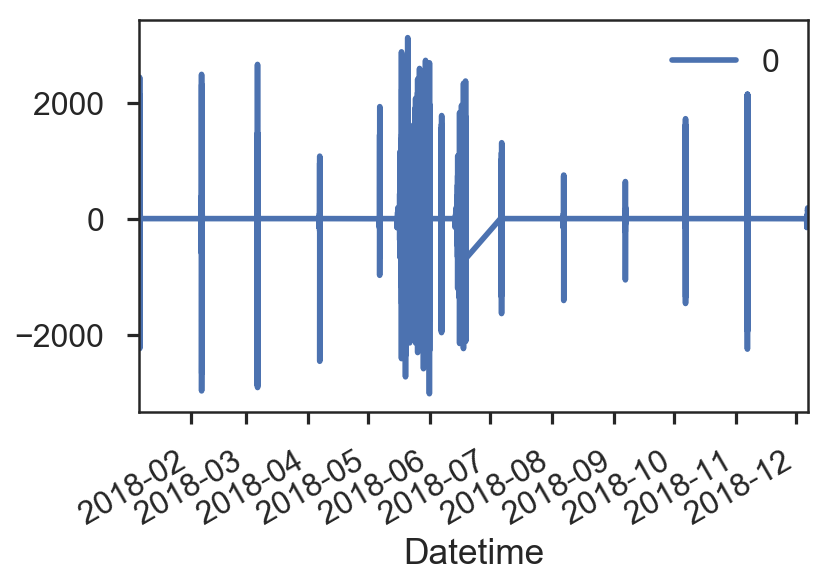

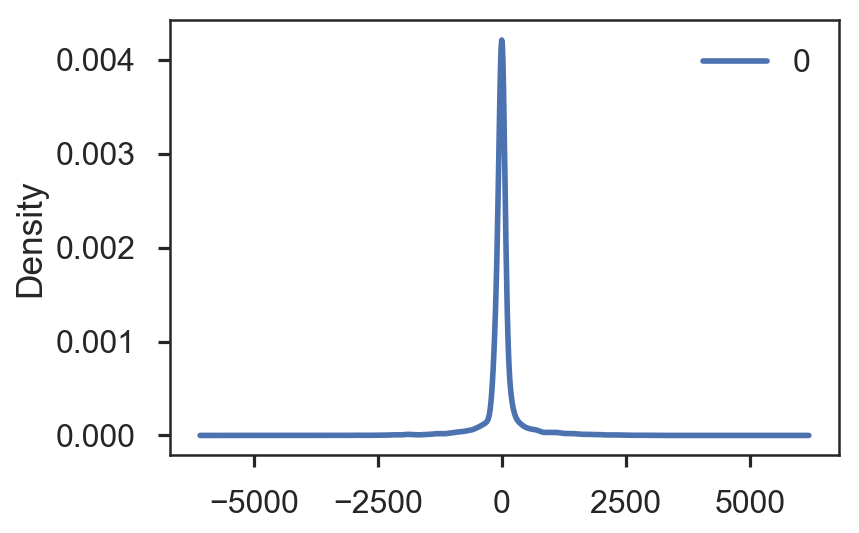

                0
count  9967.00000
mean     -0.02785
std     367.16770
min   -3017.67039
25%     -50.34963
50%       0.46375
75%       7.72352
max    3119.56675


In [13]:
series = ts_df
# fit model
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
data = pd.Series(ts_df.P_ac, index=ts_df.index)
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()